<a href="https://colab.research.google.com/github/GabrielCdev/HELP_International_Analysis/blob/main/HELP_International_Analysis2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Desafio 2

##HELP International
"A HELP International é uma ONG humanitária internacional que está empenhada em combater a pobreza e fornecer às pessoas de países atrasados ​​serviços básicos e alívio durante o período de desastres e calamidades naturais."

Base para a atividade: https://www.kaggle.com/rohan0301/unsupervised-learning-on-country-data

###....:::: Membros ::::....
Gabriel Borges Calheiros

Izadora de Oliveira Machado Paim

Laianne Protasio

##Objetivo:
Realizar EDA, pré-processamento, agrupar utilizando as técnicas de agrupamento apresentadas na disciplina, analisar os grupos encontrados e selecionar 5 países que mais precisam de ajuda internacional.


# Atributos da base de dados

- country: Nome do país;
- child_mort: Morte de crianças menores de 5 anos por 1000 nascidos vivos;
- exports: Exportações de bens e serviços per capita. Dado como % de idade do PIB per capita;
- health: Gasto total com saúde per capita. Dado como % de idade do PIB per capita;
- imports: Importações de bens e serviços per capita. Dado como % de idade do PIB per capita;
- Income: Renda líquida por pessoa;
- Inflation: A medição da taxa de crescimento anual do PIB Total;
- life_expec: O número médio de anos que uma criança recém-nascida viveria se os atuais padrões de mortalidade permanecessem os mesmos;
- total_fer: O número de filhos que nasceriam de cada mulher se as taxas atuais de fecundidade por idade permanecessem as mesmas;
- gdpp: O PIB per capita. Calculado como o PIB total dividido pela população total.

#Importação das bibliotecas necessárias

In [ ]:
# Bibliotecas Principais
import numpy as np
import pandas as pd

# Bibliotecas para visualização
import seaborn as sns
import matplotlib.pyplot as plt

# Para Clusterização
from sklearn.metrics import silhouette_score
import scipy.cluster.hierarchy as sch
from sklearn.cluster import KMeans, AgglomerativeClustering 

In [ ]:
!pip install kneed
from kneed import KneeLocator

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


#Importação dos dados

In [ ]:
# Importação do dataset
help_df = pd.read_csv('https://raw.githubusercontent.com/GabrielCdev/HELP_International_Analysis/main/dataset/Country-data.csv')

#Visualização dos dados

In [ ]:
help_df.head(5)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [ ]:
help_df.tail(5)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310
166,Zambia,83.1,37.0,5.89,30.9,3280,14.00,52.0,5.40,1460


# Análise exploratória

In [ ]:
help_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


A partir das informações gerais podemos concluir:

* É uma base de dados com 167 registros e composta por 10 atributos;
* Não possui dados nulos mas não quer dizer que não tenham dados ausentes.
* Os tipos são em sua maioria composta por "float64".

## Distribuição dos dados

In [ ]:
help_df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


Através das descrições dos atributos podemos concluir que:

* O valor máximo de "child_mort" é 208, o que indica que pelo menos um país no conjunto de dados tem uma taxa de mortalidade infantil muito alta;
* A média "exports" e "imports" são 41,11% e 46,90% do PIB, respectivamente. O desvio padrão para ambos é relativamente alto, o que indica uma ampla variação na dependência comercial dos países do conjunto de dados;
* O "health" gasto médio é de 6,82% do PIB, indicando que a saúde é um setor importante na maioria dos países. No entanto, o desvio padrão é relativamente baixo, sugerindo que a distribuição dos gastos com saúde entre os países não é muito diversa;
*  A média de "income" e "gdpp" são $17.144,69 e $12.964,16, respectivamente. Com altos desvios padrão indicando uma ampla variação nos níveis de renda e PIB per capita entre os países; 
* O valor máximo de "income" é $125.000, o que sugere que pelo menos um país no conjunto de dados tem um nível de renda muito alto;
* A média da taxa de inflação é de 7,78%, com um alto desvio padrão de 10,57%, indicando que há uma grande variação nas taxas de inflação entre os países. O valor máximo é de 104, o que sugere que pelo menos um país no conjunto de dados experimentou inflação muito alta;
*  A expectativa de vida média é de 70,56 anos, com um desvio padrão relativamente baixo, indicando que a distribuição da expectativa de vida entre os países não é muito diversificada. O valor mínimo de 32,1 sugere que pelo menos um país tem uma expectativa de vida muito baixa, enquanto o valor máximo de 82,8 sugere que pelo menos um país tem uma expectativa de vida muito alta;

Visto que os atributos "exports", "imports" e "health" estão como porcentagem do PIB per capita, e não nos fornece um valor claro para o país, será calculado o valor real de seus valores percentuais.

In [ ]:
# Calculo e substituição dos valores de "health", "imports" e "exports"

help_df1 = help_df.copy()
help_df1['exports'] = help_df1['exports'] * help_df1['gdpp']/100
help_df1['imports'] = help_df1['imports'] * help_df1['gdpp']/100
help_df1['health'] = help_df1['health'] * help_df1['gdpp']/100
help_df1

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,1384.02,155.9250,1565.190,2950,2.62,63.0,3.50,2970
163,Venezuela,17.1,3847.50,662.8500,2376.000,16500,45.90,75.4,2.47,13500
164,Vietnam,23.3,943.20,89.6040,1050.620,4490,12.10,73.1,1.95,1310
165,Yemen,56.3,393.00,67.8580,450.640,4480,23.60,67.5,4.67,1310


##Verificação de dados duplicados

In [ ]:
help_df1[help_df1.duplicated()]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp


Esta base não possui dados duplicados.

##Verificação de dados nulos

In [ ]:
help_df1.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

Não possuem dados nulos.

##Alteração do index

In [ ]:
help_df1.set_index('country', inplace=True)

##Análise univariada

###Visualização da frequência de cada atributo quantitativo

In [ ]:
help_df1.columns

Index(['child_mort', 'exports', 'health', 'imports', 'income', 'inflation',
       'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

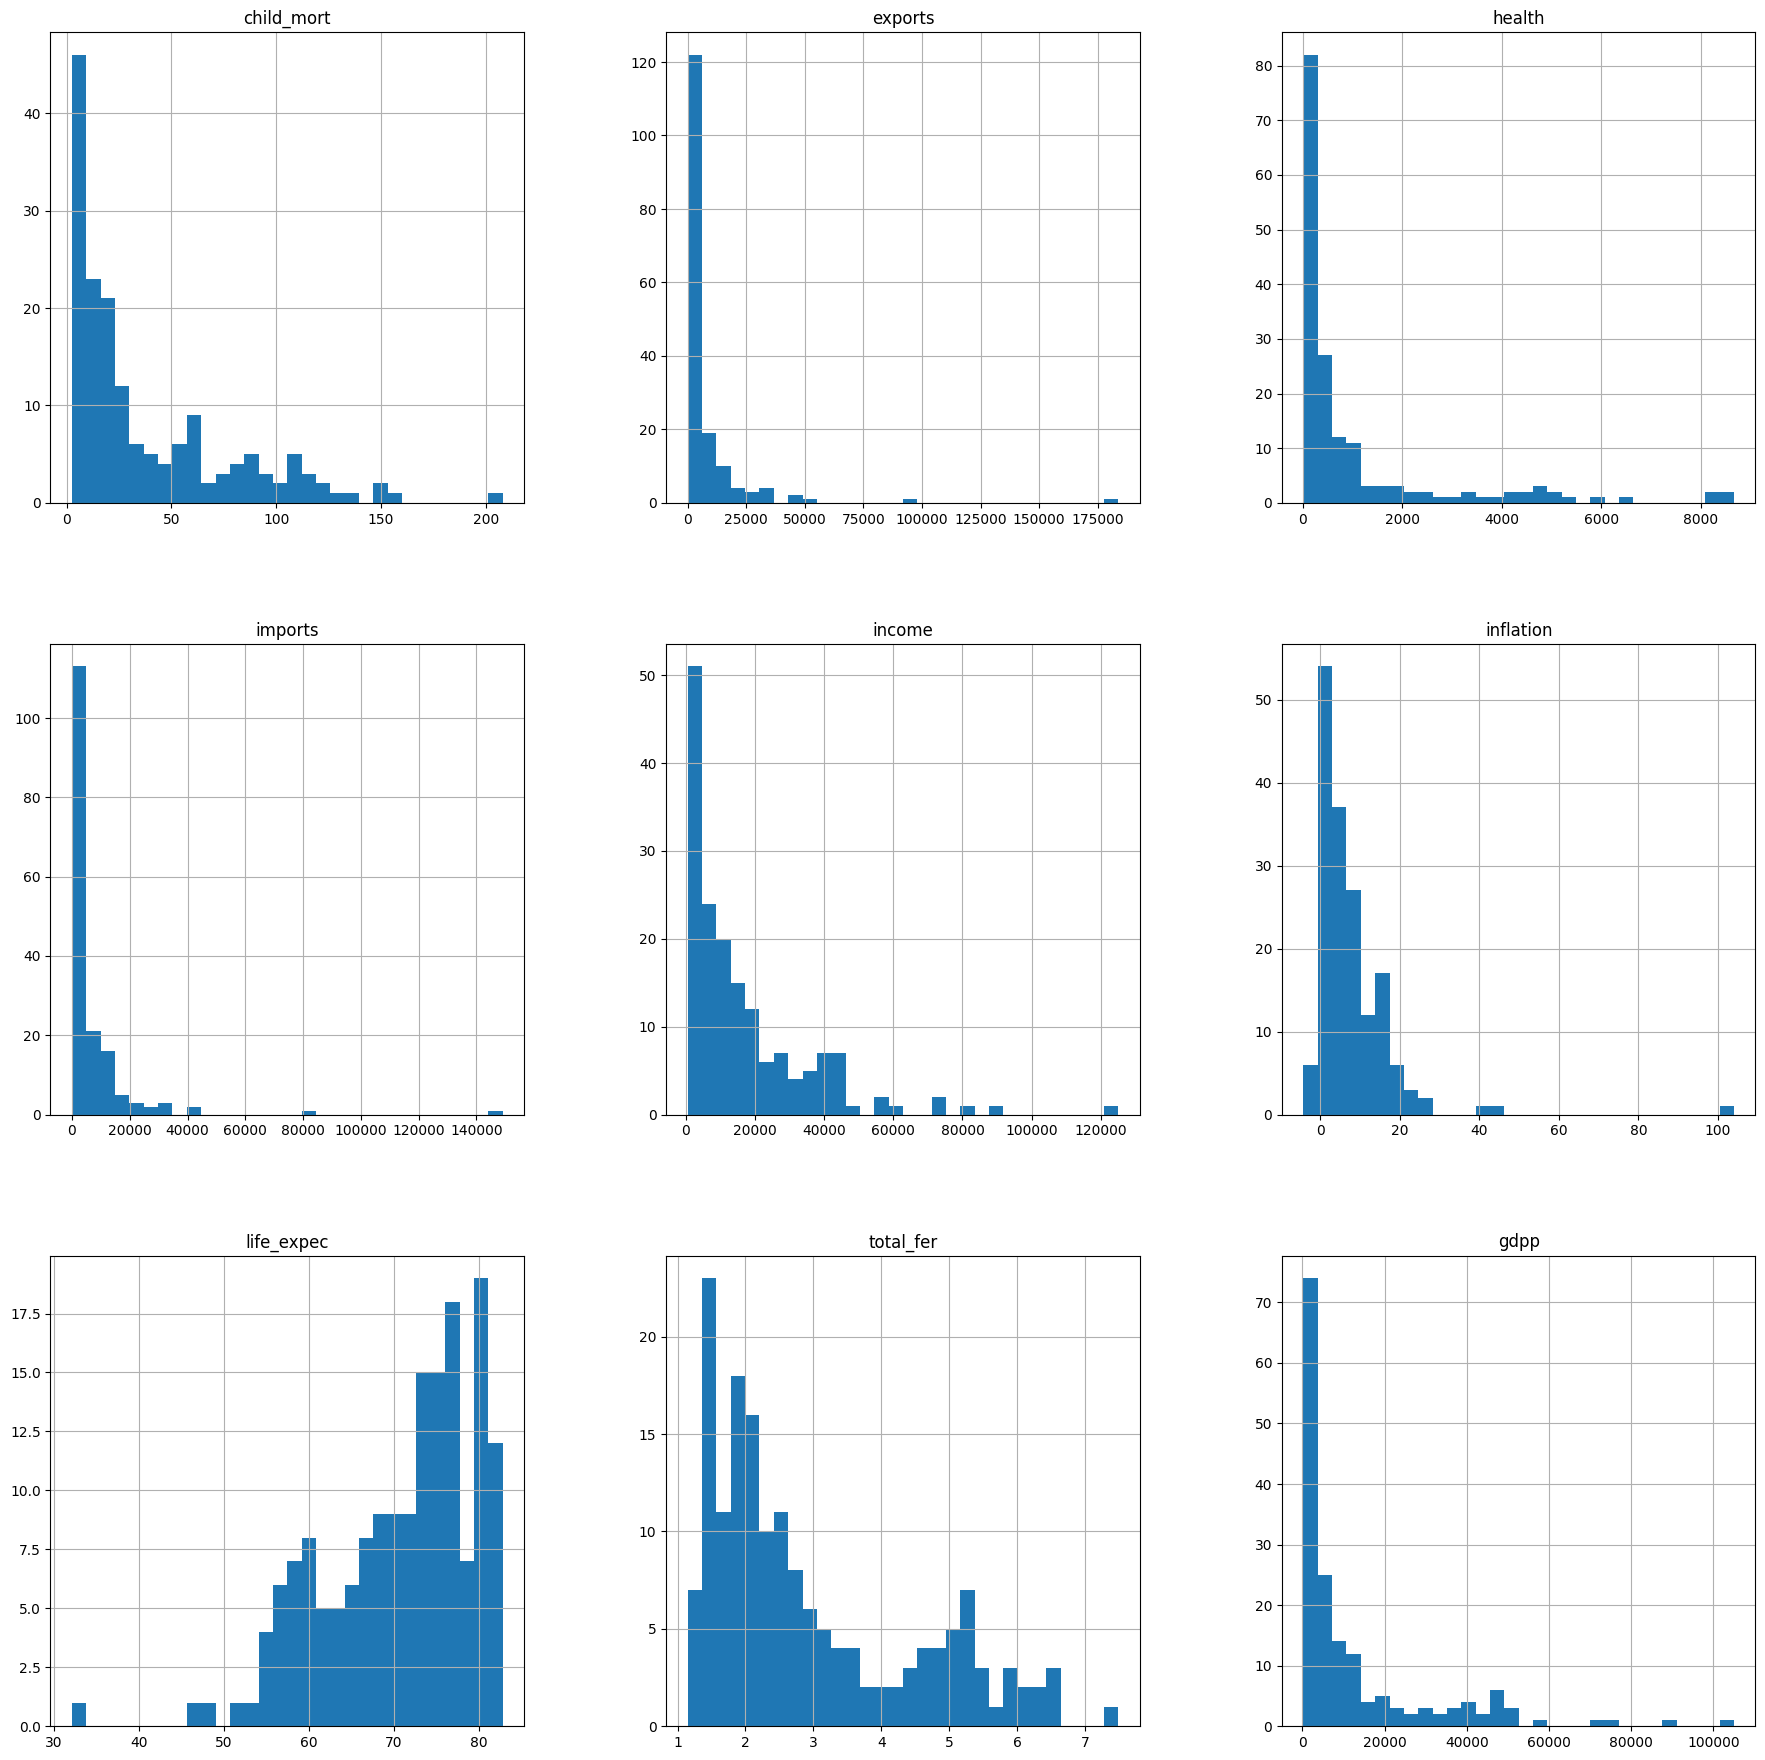

In [ ]:
features = ['child_mort', 'exports', 'health', 'imports', 'income', 'inflation',
            'life_expec', 'total_fer', 'gdpp']
help_df1[features].hist(figsize=(22, 22), bins=30);

Através dos histogramas observamos que:

* A quantidade de todos os atributos, exceto o atributo "life_expec", é baixa na maioria dos países do conjunto de dados.
* Ao contrário de outros atributos, o atributo "life_expec" é inclinado para a direita.

* 30% dos países neste dataset possui alta taxa de mortalidade infantil (> 50)

ref: https://tabnet.datasus.gov.br/cgi/idb2000/fqc01.htm

* Mais de 95% dos países tem investimentos menores que 12% em saúde;
* Apenas 8 países (apróx.: 5%) possuem renda líquida e PIB per capta superior a 50.000;
* Apenas 1 país possui inflação acima de 50 pontos;

## Verificando outliers

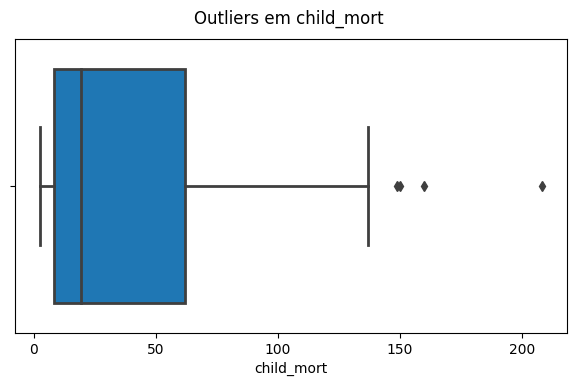

In [ ]:
sns.boxplot(data=help_df1, x=help_df1['child_mort'], saturation=1, linewidth=2)
plt.suptitle(f"Outliers em child_mort", y=0.85)
plt.tight_layout(pad=3.0)
plt.show()

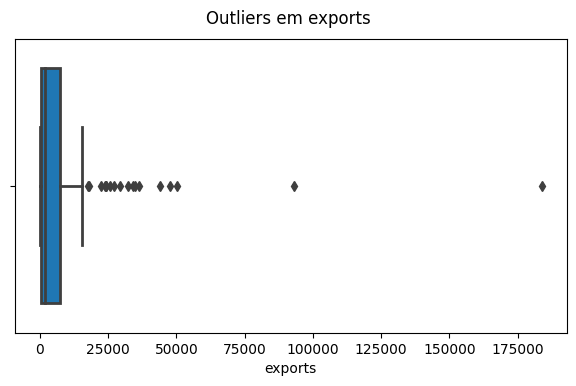

In [ ]:
sns.boxplot(data=help_df1, x=help_df1['exports'], saturation=1, linewidth=2)
plt.suptitle(f"Outliers em exports", y=0.85)
plt.tight_layout(pad=3.0)
plt.show()

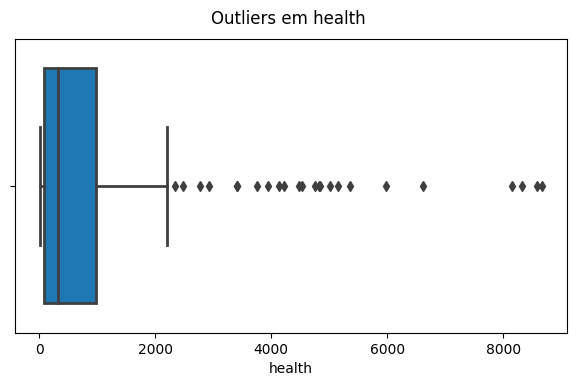

In [ ]:
sns.boxplot(data=help_df1, x=help_df1['health'], saturation=1, linewidth=2)
plt.suptitle(f"Outliers em health", y=0.85)
plt.tight_layout(pad=3.0)
plt.show()

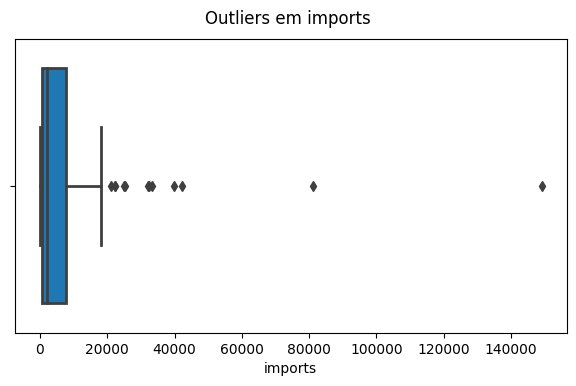

In [ ]:
sns.boxplot(data=help_df1, x=help_df1['imports'], saturation=1, linewidth=2)
plt.suptitle(f"Outliers em imports", y=0.85)
plt.tight_layout(pad=3.0)
plt.show()

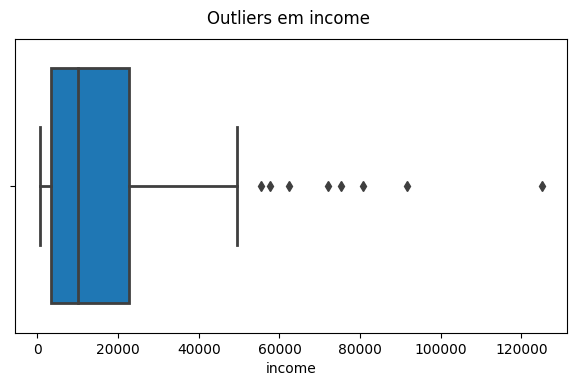

In [ ]:
sns.boxplot(data=help_df1, x=help_df1['income'], saturation=1, linewidth=2)
plt.suptitle(f"Outliers em income", y=0.85)
plt.tight_layout(pad=3.0)
plt.show()

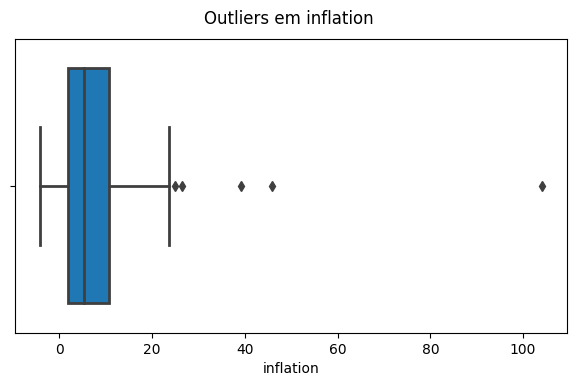

In [ ]:
sns.boxplot(data=help_df1, x=help_df1['inflation'], saturation=1, linewidth=2)
plt.suptitle(f"Outliers em inflation", y=0.85)
plt.tight_layout(pad=3.0)
plt.show()

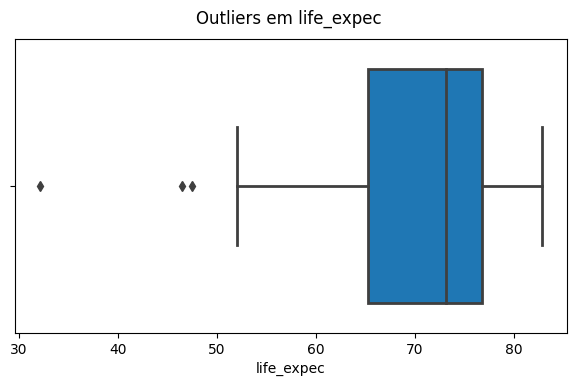

In [ ]:
sns.boxplot(data=help_df1, x=help_df1['life_expec'], saturation=1, linewidth=2)
plt.suptitle(f"Outliers em life_expec", y=0.85)
plt.tight_layout(pad=3.0)
plt.show()

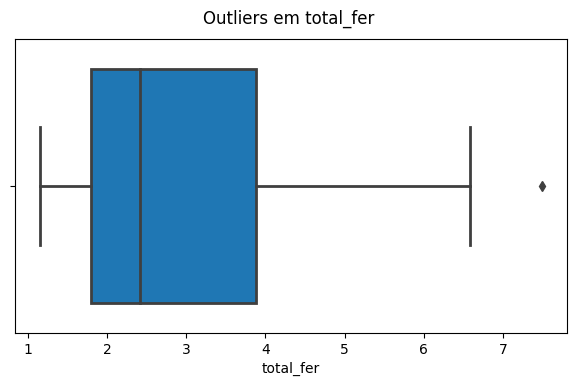

In [ ]:
sns.boxplot(data=help_df1, x=help_df1['total_fer'], saturation=1, linewidth=2)
plt.suptitle(f"Outliers em total_fer", y=0.85)
plt.tight_layout(pad=3.0)
plt.show()

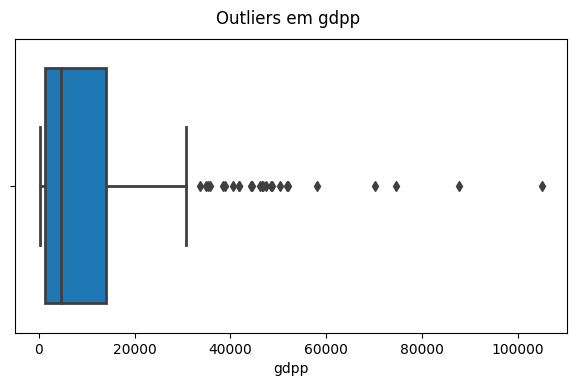

In [ ]:
sns.boxplot(data=help_df1, x=help_df1['gdpp'], saturation=1, linewidth=2)
plt.suptitle(f"Outliers em gdpp", y=0.85)
plt.tight_layout(pad=3.0)
plt.show()

* Intervalo interquartílico (IQR)

In [ ]:
# Calculando o IQR
Q1 = help_df1['life_expec'].quantile(0.25)
Q3 = help_df1['life_expec'].quantile(0.75)
IQR = Q3 - Q1

# Calculando os limites superior e inferior
inferior_limite = Q1 - (1.5 * IQR)
superior_limite = Q3 + (1.5 * IQR)

# Identificando os outliers
outliers = help_df1[(help_df1['life_expec'] < inferior_limite) | (help_df1['life_expec'] > superior_limite)]

outliers

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
country,,,,,,,,,
Central African Republic,149.0,52.628,17.7508,118.190,888,2.01,47.5,5.21,446
Haiti,208.0,101.286,45.7442,428.314,1500,5.45,32.1,3.33,662
Lesotho,99.7,460.980,129.8700,1181.700,2380,4.15,46.5,3.30,1170


Assim observamos que:

* Todos os atributos possuem outliers no lado direito (valores mais altos), exceto life_expec, que tem outliers no lado esquerdo (valores menores), indicando que geralmente a expectativa de vida na maioria dos países é superior a 50 anos, exceto em 3 países (Lesoto, Haiti, República Centro-Africana).
* Já podendo ser indicado como boas opções para ajuda financeira: Lesoto, Haiti, República Centro-Africana.

## Análise multivariada

Visualizando correlação entre os atributos

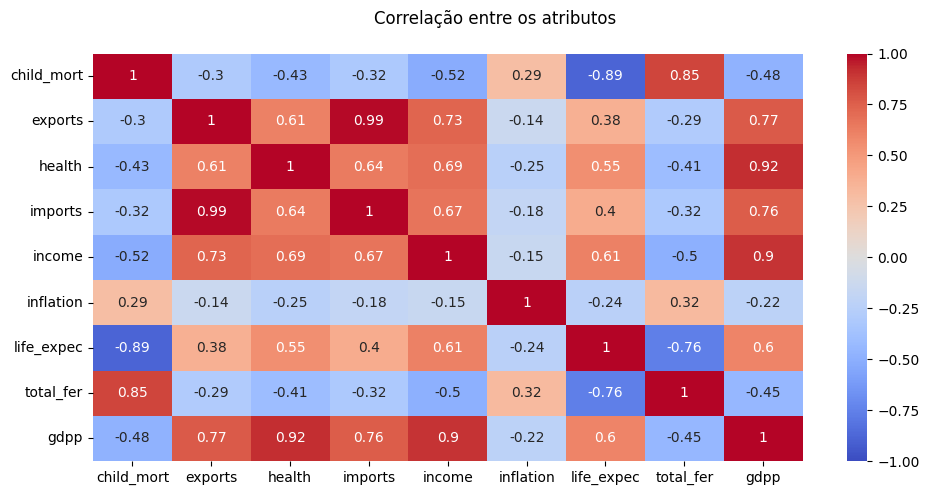

In [ ]:
plt.figure(figsize=(10,5), dpi=100)
sns.heatmap(round(help_df1.corr(),2), annot = True, vmin=-1, vmax=1, center= 0, cmap= 'coolwarm')
plt.suptitle(f"Correlação entre os atributos")
plt.tight_layout()
plt.show()

O mapa de calor mostra que os atributos imports e exports têm uma correlação muito alta. Também mostra que os atributos imports, exports, health, income e life_expec têm uma correlação direta com o atributo gdpp e superior a 0,6.

# Modelos de Clusters

In [ ]:
from sklearn.datasets import load_iris, load_wine
from sklearn.metrics import silhouette_samples
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from matplotlib import cm
from sklearn.cluster import KMeans

## Padronizando os dados

In [ ]:
help_df2 = help_df1.copy()

# Padronizando dataset
scaler = StandardScaler().fit(help_df2)
df_trans = scaler.transform(help_df2)
help_df3 = pd.DataFrame(df_trans, columns = help_df2.columns, index=help_df2.index[:])
help_df3

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
country,,,,,,,,,
Afghanistan,1.291532,-0.411011,-0.565040,-0.432276,-0.808245,0.157336,-1.619092,1.902882,-0.679180
Albania,-0.538949,-0.350191,-0.439218,-0.313677,-0.375369,-0.312347,0.647866,-0.859973,-0.485623
Algeria,-0.272833,-0.318526,-0.484826,-0.353720,-0.220844,0.789274,0.670423,-0.038404,-0.465376
Angola,2.007808,-0.291375,-0.532363,-0.345953,-0.585043,1.387054,-1.179234,2.128151,-0.516268
Antigua and Barbuda,-0.695634,-0.104331,-0.178771,0.040735,0.101732,-0.601749,0.704258,-0.541946,-0.041817
...,...,...,...,...,...,...,...,...,...
Vanuatu,-0.225578,-0.336864,-0.501562,-0.342488,-0.738527,-0.489784,-0.852161,0.365754,-0.546913
Venezuela,-0.526514,-0.199393,-0.219310,-0.287205,-0.033542,3.616865,0.546361,-0.316678,0.029323
Vietnam,-0.372315,-0.361463,-0.538488,-0.377572,-0.658404,0.409732,0.286958,-0.661206,-0.637754


## PCA

In [ ]:
pca = PCA(n_components=9)
pca_df = pd.DataFrame(pca.fit_transform(help_df3), columns=[f"pc{i}" for i in range(1,10)], index=help_df3.index)
pca.explained_variance_

array([5.33631081e+00, 1.67006556e+00, 8.97406142e-01, 5.49797220e-01,
       2.74267850e-01, 2.22718073e-01, 8.50864327e-02, 1.40921616e-02,
       4.47261467e-03])

Esses são os valores de variância de cada atributo presente no conjunto de dados.

Aqui, a variância máxima é 5,34 e 1,67, que está relacionada a pc1 e pc2.

In [ ]:
pca.explained_variance_ratio_

array([5.89372984e-01, 1.84451685e-01, 9.91147170e-02, 6.07227801e-02,
       3.02917253e-02, 2.45982702e-02, 9.39743701e-03, 1.55641971e-03,
       4.93981394e-04])

O primeiro componente explicou 58,9% de variação, o segundo componente explicou 18,4% de variação e o terceiro componente explicou 9,9% de variação.

In [ ]:
pca_df2 = pca_df.drop(columns = [f"pc{i}" for i in range(5,10)])
pca_df2.head()

,pc1,pc2,pc3,pc4
country,,,,
Afghanistan,-2.635575,1.472267,-0.549489,-0.242326
Albania,-0.024206,-1.429892,-0.014123,0.450645
Algeria,-0.459557,-0.675495,0.959355,0.218456
Angola,-2.722630,2.172332,0.600215,-0.433978
Antigua and Barbuda,0.648597,-1.023437,-0.257430,0.289201


Visualizando apenas os primeiros 4 componentes principais que explicam a maior variação nos dados.

## Kmeans + PCA

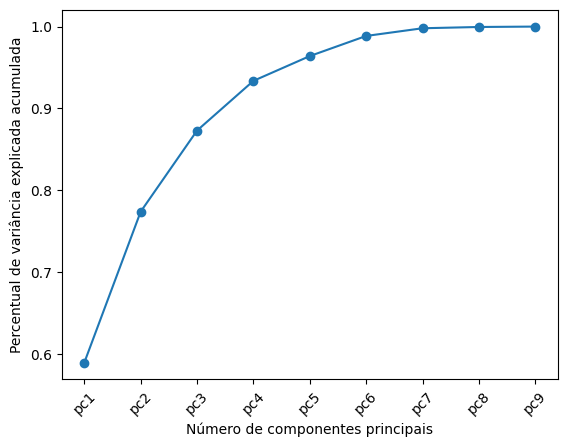

In [ ]:
# Método em que é feita a soma das variações de todos os atributos em formato cumulativo
variancia_explicada_acumulada = np.cumsum(pca.explained_variance_ratio_)

fig, ax = plt.subplots()
eixo_x = list(range(1, len(variancia_explicada_acumulada)+1))
ax.plot(eixo_x, variancia_explicada_acumulada, marker="o")
ax.set_xlabel("Número de componentes principais")
ax.set_ylabel("Percentual de variância explicada acumulada")
ax.set_xticks(range(1, len(pca.explained_variance_ratio_)+1), list(pca_df.columns), rotation=45)
plt.show()

Em sequência determinamos o k ideal (número de clusters) usando a técnica de cotovelo e, em seguida, implementamos o algoritmo kmeans para o k ideal.

In [ ]:
# Algoritmo Kmeans
kmeans_set = {"init":"random", "n_init":10, "max_iter":300, "random_state":42}

# Encontrando inercia para k cluster
inercia = []
for k in range(1,11):
    kmeans = KMeans(n_clusters=k, **kmeans_set)
    kmeans.fit(pca_df2)
    inercia.append(kmeans.inertia_)

In [ ]:
def elbow_optimizer(inercia, name):

    kl = KneeLocator(range(1,11), inercia, curve='convex', direction="decreasing")
    sns.lineplot(x=range(1,11), y=inercia, linewidth=3)
    plt.xticks(range(1,11))
    plt.xlabel("Número de Clusters", labelpad=20)
    plt.ylabel("Inercia", labelpad=20)
    plt.title(f"Elbow Método para {name}", y=1.09)
    plt.axvline(x=kl.elbow, color= 'black', label='axvline-fullheight', ls='--', linewidth=3)
    plt.show()

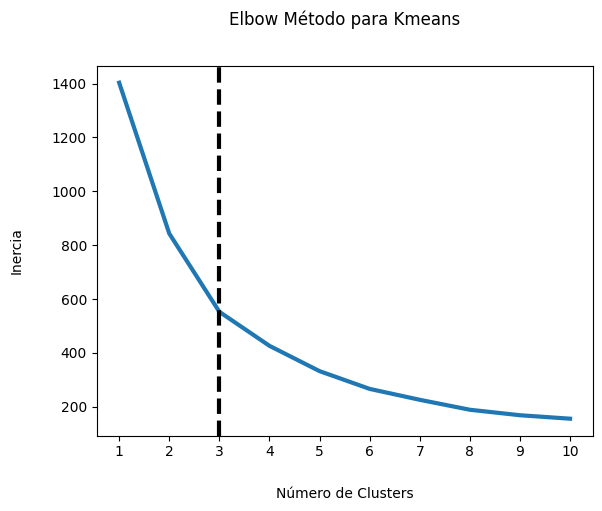

In [ ]:
elbow_optimizer(inercia, 'Kmeans')

Com base no método do cotovelo, o número ótimo de clusters para o algoritmo kmeans é igual a 3. 

Avaliamos esse resultado com a ajuda de técnicas de validação interna, iremos usar o silhouette_score.

In [ ]:
silhouette_coef = []
for k in range(2,11):
    kmeans = KMeans(n_clusters=k, **kmeans_set)
    kmeans.fit(pca_df2)
    score = silhouette_score(pca_df2, kmeans.labels_)
    silhouette_coef.append(score)

In [ ]:
def plot_avaliacao(sh_score, name, x=range(2,11)):
    
    fig, ax = plt.subplots(figsize=(10,5), dpi=100)
    ax.plot(x, sh_score, marker='o', ms=9)
    ax.set_xlabel("Número de Clusters", labelpad=20)
    ax.set_ylabel("Silhouette Coeficiente", labelpad=20)
    plt.suptitle(f'Avaliando {name} Clustering',y=0.9)
    plt.tight_layout(pad=3)
    plt.show()

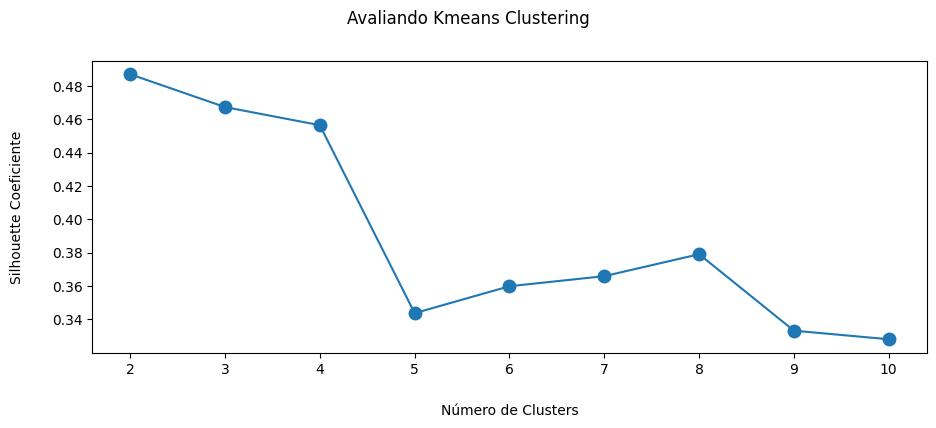

In [ ]:
plot_avaliacao(silhouette_coef, 'Kmeans')

De acordo com os resultados obtidos nos gráficos acima, ambos confirmam o número de 3 clusters como o k ideal.

Portanto, consideramos que o k ideal é 3 e novamente implementamos kmeans para n_clusters=3.

In [ ]:
def silhueta(X, y_km):
  # find cluster labels and number of clusters
  cluster_labels = np.unique(y_km)
  n_clusters = cluster_labels.shape[0]

  # calculate silhouettes
  silhouette_vals = silhouette_samples(X, y_km, metric='euclidean')

  # plot silhouette
  fig, ax = plt.subplots()
  y_ax_lower, y_ax_upper = 0, 0
  yticks = []
  for i, c in enumerate(cluster_labels):
      c_silhouette_vals = silhouette_vals[y_km == c]
      c_silhouette_vals.sort()
      y_ax_upper += len(c_silhouette_vals)
      color = cm.jet(float(i) / n_clusters)
      ax.barh(
          range(y_ax_lower, y_ax_upper),
          c_silhouette_vals, 
          height=1.0, edgecolor='none',
          color=color
      )
      yticks.append((y_ax_lower + y_ax_upper) / 2.)
      y_ax_lower += len(c_silhouette_vals)

  # calculate silhouette score    
  silhouette_avg = np.mean(silhouette_vals)

  ax.axvline(silhouette_avg, color="red", linestyle="--") 
  ax.set_yticks(yticks, cluster_labels + 1)
  ax.set_ylabel('Cluster')
  ax.set_xlabel('Silhouette coefficient')
  ax.plot()

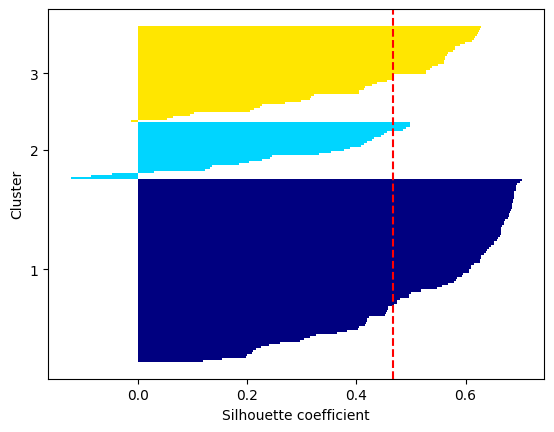

In [ ]:
km = KMeans(
    n_clusters=3, init='k-means++',
    n_init=10, max_iter=300,
    tol=1e-04, random_state=0
)
y_km = km.fit_predict(pca_df2)
silhueta(pca_df2, y_km)

<Axes: xlabel='pc1', ylabel='pc2'>

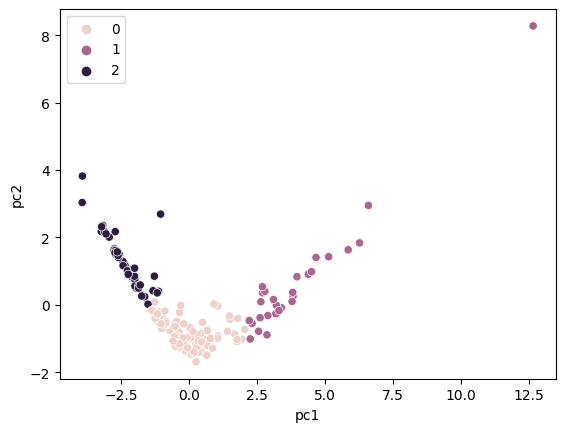

In [ ]:
# Visualizando a partição
sns.scatterplot(x='pc1', y='pc2', data=pca_df2, hue=y_km)

Aplicando n_clusters= 3

In [ ]:
pca = PCA(n_components=3)
pca_df3 = pca.fit_transform(pca_df2)

In [ ]:
pd.DataFrame(pca_df3)

,0,1,2
0,-2.635575,1.472267,-0.549489
1,-0.024206,-1.429892,-0.014123
2,-0.459557,-0.675495,0.959355
3,-2.722630,2.172332,0.600215
4,0.648597,-1.023437,-0.257430
...,...,...,...
162,-1.175210,-0.275652,-0.667131
163,-0.314228,-0.016266,3.680273
164,-0.594449,-1.076335,0.528875
165,-1.802372,0.588729,1.180851


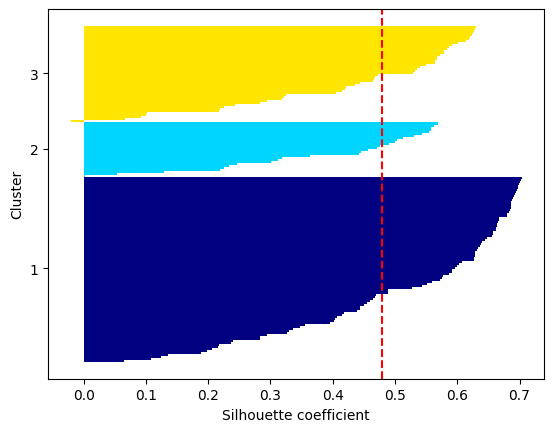

In [ ]:
#Analisando o agrupamento com os novos dados
y_km2 = km.fit_predict(pca_df3)
silhueta(pca_df3, y_km2)

## Cluster Hierarquico + PCA

In [ ]:
def dendograma(data):
  plt.figure(figsize=(10,5), dpi=200, linewidth=0.5)
  plt.plot(linewidth=1)
  sch.dendrogram(sch.linkage(data, method='ward'), truncate_mode='level', p=6)
  plt.title('Dendrograma')
  plt.xlabel('Customers')
  plt.ylabel('Euclidean distances')
  plt.show()

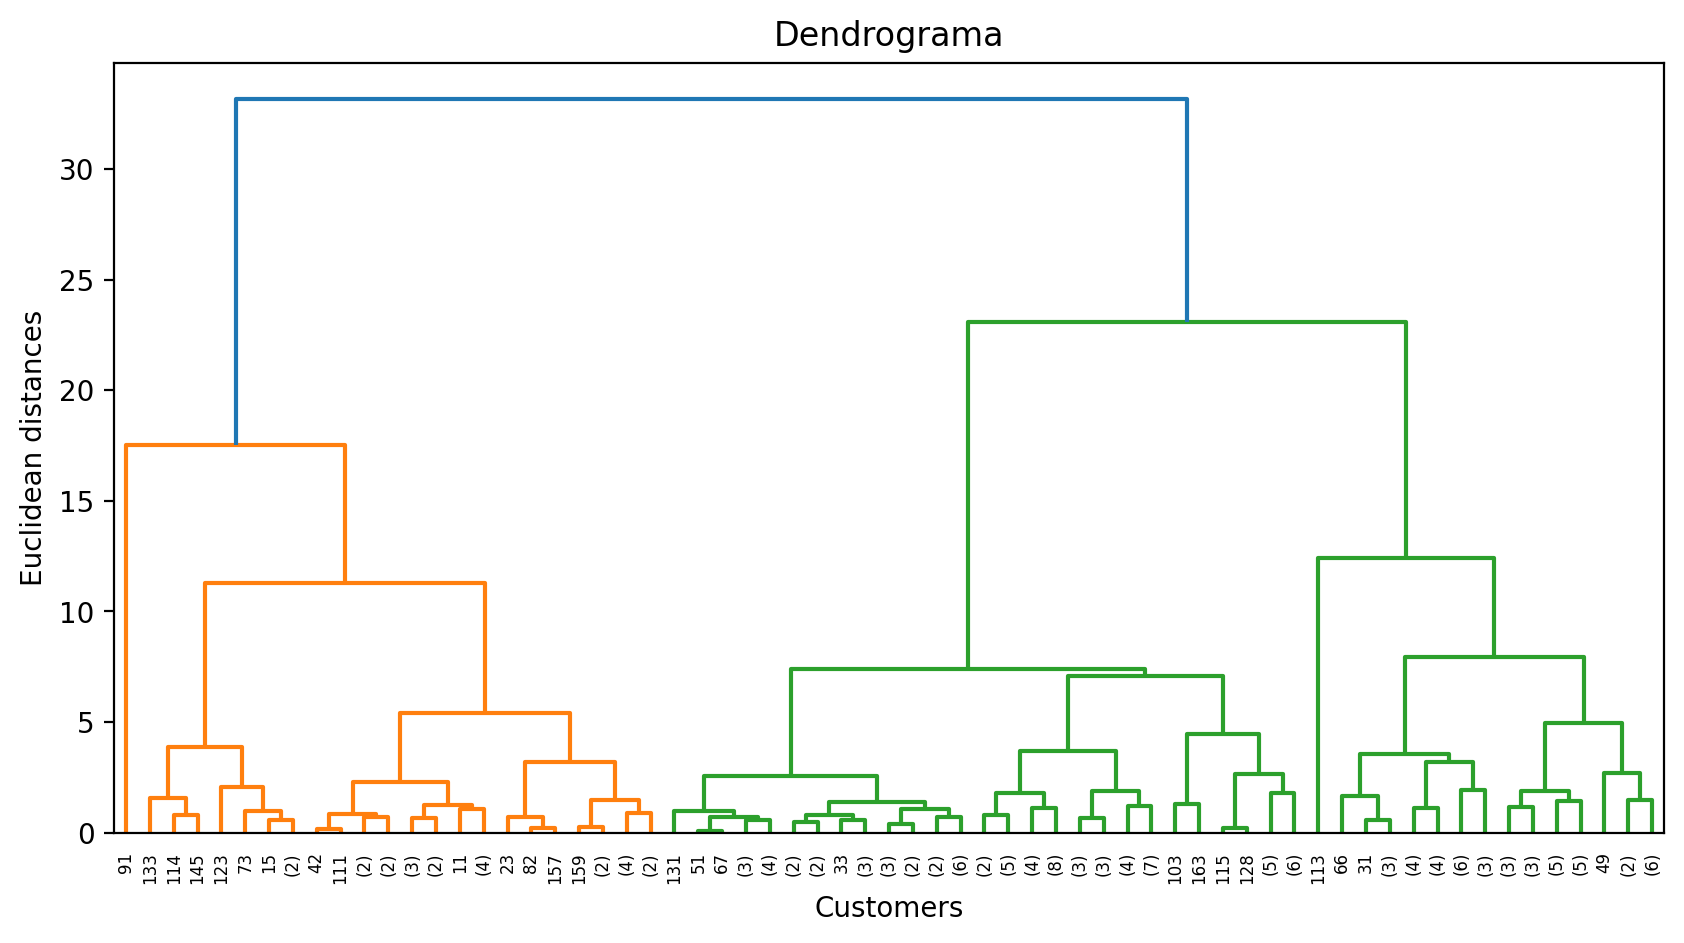

In [ ]:
dendograma(pca_df3)

In [ ]:
silhouette_coef = []
for k in range(2,15):
    agg = AgglomerativeClustering(n_clusters=k)
    agg.fit(pca_df3)
    score = silhouette_score(pca_df3, agg.fit_predict(pca_df3))
    silhouette_coef.append(score)

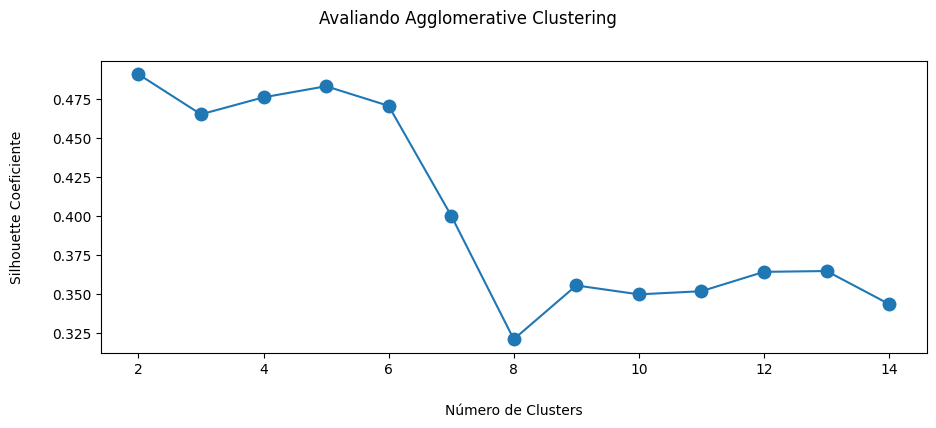

In [ ]:
plot_avaliacao(silhouette_coef, 'Agglomerative', x=range(2,15))

De acordo com os diagramas acima, n_clusters=4 é apropriado. Portanto, implementamos o algoritmo Aglomerativo com n_clusters=4

In [ ]:
#Configuração para visualizar linhas
pd.set_option('display.max_rows', None)

In [ ]:
agg = AgglomerativeClustering(n_clusters=4)
agg.fit(pca_df2)

# Armazenar resultado do Aglomerativo
pred = agg.labels_

# Avaliando os resultados por silhueta
sh_score = silhouette_score(pca_df2, pred)

# Resultados
print(f"Silhouette Coefficient: {sh_score:.2f}")

# Adicionando a coluna de clusters ao dataframe pca_df2
df_result_agg = pd.concat([pca_df2, pd.DataFrame(pred, columns=['cluster'], index=pca_df.index)], axis = 1)
df_result_agg

Silhouette Coefficient: 0.47


,pc1,pc2,pc3,pc4,cluster
country,,,,,
Afghanistan,-2.635575,1.472267,-0.549489,-0.242326,0
Albania,-0.024206,-1.429892,-0.014123,0.450645,2
Algeria,-0.459557,-0.675495,0.959355,0.218456,2
Angola,-2.722630,2.172332,0.600215,-0.433978,0
Antigua and Barbuda,0.648597,-1.023437,-0.257430,0.289201,2
Argentina,0.035422,-0.685251,1.468697,-0.028838,2
Armenia,-0.334555,-1.271889,0.190564,0.500247,2
Australia,3.181525,-0.262485,-0.130870,-1.678358,1
Austria,3.816857,0.248363,-0.258960,-1.018163,1


Nesta clusterização, os países de Singapura e Luxemburgo, possuem as melhores condições em termos de indicadores de desenvolvimento do que outros países, são colocados sozinhos no cluster 3.

Além disso, como pode ser visto nos gráficos, a maioria dos países europeus que apresentam um alto nível dos indicadores desejados se situam no cluster 1.

Os países que têm um nível médio nos indicadores, como a maioria dos países asiáticos e alguns outros países, estão localizados no cluster 2. 
Todos os países sul-americanos que foram examinados estão incluídos neste cluster 2.

E por último, os indicados para ajuda financeira neste trabalho são os países que apresentam um baixo nível de indicadores de desenvolvimento, que são a maioria dos países africanos, e estão no cluster 0.

Portanto, os resultados obtidos são consistentes com a análise realizada na seção de Análise Exploratória.

In [ ]:
df_result_agg.loc[df_result_agg['cluster'] == 0]

,pc1,pc2,pc3,pc4,cluster
country,,,,,
Afghanistan,-2.635575,1.472267,-0.549489,-0.242326,0
Angola,-2.722630,2.172332,0.600215,-0.433978,0
Benin,-2.363962,1.171696,-1.247192,-0.257106,0
Botswana,-1.129489,0.401611,-0.231994,0.102647,0
Burkina Faso,-2.751480,1.664991,-0.848207,-0.345046,0
Burundi,-2.762440,1.628790,-0.299329,-0.309938,0
Cameroon,-2.438923,1.288278,-1.226104,-0.226851,0
Central African Republic,-3.236946,2.178414,-1.602973,-0.337091,0
Chad,-3.185395,2.354073,-1.078613,-0.567728,0


In [ ]:
df_sorted = df_result_agg.sort_values('pc1', ascending=True)

# Mostrando o dataframe ordenado
print(df_sorted)

                                      pc1       pc2       pc3       pc4  \
country                                                                   
Haiti                           -3.937287  3.036998 -1.756335 -0.266013   
Nigeria                         -3.931802  3.821230  7.928939 -0.540160   
Central African Republic        -3.236946  2.178414 -1.602973 -0.337091   
Sierra Leone                    -3.223706  2.317240 -0.109186 -0.415019   
Chad                            -3.185395  2.354073 -1.078613 -0.567728   
Congo, Dem. Rep.                -3.114930  2.170747  0.361477 -0.433233   
Niger                           -3.060794  2.105242 -1.325128 -0.583595   
Mali                            -2.944260  2.010103 -1.142610 -0.521593   
Burundi                         -2.762440  1.628790 -0.299329 -0.309938   
Burkina Faso                    -2.751480  1.664991 -0.848207 -0.345046   
Mozambique                      -2.730326  1.546608 -0.780421 -0.225255   
Angola                   